# imports 

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
import wrangle 
from importlib import reload
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
plt.rc('figure', figsize=(13, 7))
plt.style.use('dark_background')

# Wrangle
- Load the README data set.

In [2]:
reload(wrangle)

<module 'wrangle' from '/Users/vincentbanuelos/codeup-data-science/nlp_project/wrangle.py'>

In [3]:
df = wrangle.get_search_csv()
df = wrangle.prep_text(df)

In [4]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_scale(df)
df = train

In [5]:
df

language                                         lemmatized  word_count
12    Python  espn api installing usage getting started api ...       188.0
26      HTML  readmemd nbasportvu code exploring nba sportvu...        95.0
84     other  readmemd boxscorereplaycom source code boxscor...        15.0
56      HTML  basketball feature readmemd basketball basketb...        60.0
145   Python  script yahoo fantasy basketball install depend...       215.0
..       ...                                                ...         ...
83     other  kawhi statsnbacom library jump ball readmemd k...        53.0
59    Python  espn basketball usage readmemd espn basketball...       181.0
57    Python  0 buestats 1 requirement 1a chromedriver 1b py...      1303.0
162    other  readmemd androidjhipsterbasketball android fro...        72.0
16    Python  sport video analysis court detection mask rcnn...       110.0

[87 rows x 3 columns]

# Explore
* created function to *flatten* the languages into less categories
    - went from 21 categories down to 6

In [6]:
language_freq = df.language.value_counts()
    
#quick takeaway --> lets combine those with 3 or less into other
#we can then backport the code to the wrangle portion
language_freq.size

5

In [7]:
df.language.value_counts()

Python        35
other         22
R             14
JavaScript    10
HTML           6
Name: language, dtype: int64

## Univariate
- histogram of langauges, 
- value counts of words by langauge ?

<AxesSubplot:>

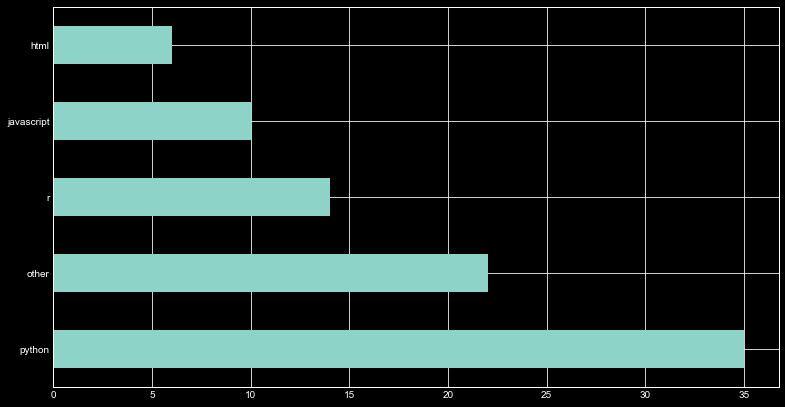

In [236]:
df.language.value_counts().plot.barh()

Create and explore bigrams for the README data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 16
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   language    87 non-null     object 
 1   lemmatized  87 non-null     object 
 2   word_count  87 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [10]:
df.language = df.language.str.lower()

In [11]:
df[df.language == 'html'].word_count.count()

6

## Class Creation

In [12]:
df.head(20)

language                                         lemmatized  word_count
12       python  espn api installing usage getting started api ...       188.0
26         html  readmemd nbasportvu code exploring nba sportvu...        95.0
84        other  readmemd boxscorereplaycom source code boxscor...        15.0
56         html  basketball feature readmemd basketball basketb...        60.0
145      python  script yahoo fantasy basketball install depend...       215.0
23       python  basketballcrawler requirement usage note todo ...       114.0
166       other  readmemd basketball betting bot another ball b...       167.0
75       python  ncaa bracket randomizer randomness lot randomn...       147.0
138        html  basketball basketball look full list feature c...       202.0
76       python  basketball tracking overview requirement usage...       221.0
181      python  nbascheduledata accessing schedule data json s...       203.0
50       python  basketnet install usage rf erf visualize netwo...        50.0
186      python  deepsportradar player reidentification challen...       499.0
27       python  readmemd script scrape analyze basketball data...       239.0
128      python  web scraping nba data using selenium alex chen...        56.0
96   javascript  basketballrecleague tech website readmemd bask...        75.0
15       python  sport game outcome prediction project bet siby...       891.0
51        other  readmemd basketballm men  basketball tool data...         7.0
92            r  sport r package online ranking method sport pa...       810.0
79        other  hoop requirement screenshots readmemd hoop nba...        88.0

In [13]:
#created class in order to facilitate bigram and trigram creation
class code_language:
  def __init__(self, words, label:str):
    self.words = words
    self.label = label
    self.unique_to_language = set()

  def whole_words(self): 
    return pd.Series(self.words.split())

  def word_counts(self):
    return pd.Series(self.words.split()).value_counts()

  def unique_words(self):
    return set(pd.Series(self.whole_words().unique()))

  def bigrams(self):
    return pd.Series(list(nltk.bigrams(self.words.split())))

  def trigrams(self):
    return pd.Series(list(nltk.ngrams(self.words.split(), 3)))

  def readme_count(self):
    return df[df.language == self.label].word_count.count()


In [14]:
# this initilizes the class objects. 
html = code_language(words=' '.join(df[df.language == 'html'].lemmatized), label='html')
javascript = code_language(words=' '.join(df[df.language == 'javascript'].lemmatized), label='javascript')
r_ = code_language(words=' '.join(df[df.language == 'r'].lemmatized), label='r')
other_ = code_language(words=' '.join(df[df.language == 'other'].lemmatized), label='other')
python_ = code_language(words=' '.join(df[df.language == 'python'].lemmatized), label='python')
all_ = code_language(words=' '.join(df.lemmatized), label='all languages')


In [15]:
df['langauge_bigrams'] = df.language

In [16]:
def bigram_placement(language):
    if language == 'html':
        language = html.bigrams()
    elif language == 'javascript':
        language = javascript.bigrams()
    elif language == 'r':
        language = r_.bigrams()
    elif language == 'python':
        language = python_.bigrams()
    else:
        language = other_.bigrams()
    return ' '.join(str(e) for e in language.to_list())

In [17]:
df.langauge_bigrams = df.langauge_bigrams.apply(bigram_placement)

In [18]:
df

language                                         lemmatized  word_count  \
12    python  espn api installing usage getting started api ...       188.0   
26      html  readmemd nbasportvu code exploring nba sportvu...        95.0   
84     other  readmemd boxscorereplaycom source code boxscor...        15.0   
56      html  basketball feature readmemd basketball basketb...        60.0   
145   python  script yahoo fantasy basketball install depend...       215.0   
..       ...                                                ...         ...   
83     other  kawhi statsnbacom library jump ball readmemd k...        53.0   
59    python  espn basketball usage readmemd espn basketball...       181.0   
57    python  0 buestats 1 requirement 1a chromedriver 1b py...      1303.0   
162    other  readmemd androidjhipsterbasketball android fro...        72.0   
16    python  sport video analysis court detection mask rcnn...       110.0   

                                      langauge_bigrams  
12   ('espn', 'api') ('api', 'installing') ('instal...  
26   ('readmemd', 'nbasportvu') ('nbasportvu', 'cod...  
84   ('readmemd', 'boxscorereplaycom') ('boxscorere...  
56   ('readmemd', 'nbasportvu') ('nbasportvu', 'cod...  
145  ('espn', 'api') ('api', 'installing') ('instal...  
..                                                 ...  
83   ('readmemd', 'boxscorereplaycom') ('boxscorere...  
59   ('espn', 'api') ('api', 'installing') ('instal...  
57   ('espn', 'api') ('api', 'installing') ('instal...  
162  ('readmemd', 'boxscorereplaycom') ('boxscorere...  
16   ('espn', 'api') ('api', 'installing') ('instal...  

[87 rows x 4 columns]

In [19]:
# testy = html.bigrams().to_list()
# ' '.join(str(e) for e in html.bigrams().to_list())

In [20]:
#this will join all the entire text column for entries labled ham
# runs them through  function
# html_words = ' '.join(df[df.language == 'HTML'].lemmatized)
# jupyter_words = ' '.join(df[df.language == 'Jupyter Notebook'].lemmatized)
# javascript_words =  ' '.join(df[df.language == 'JavaScript'].lemmatized)
# r_words =  ' '.join(df[df.language == 'R'].lemmatized)
# other_words =  ' '.join(df[df.language == 'Other'].lemmatized)
# python_words =  ' '.join(df[df.language == 'Python'].lemmatized)
# html_bigrams = pd.Series(list(nltk.bigrams(html_words)))
# jupyter_bigrams = pd.Series(list(nltk.bigrams(jupyter_words)))
# javascript_bigrams = pd.Series(list(nltk.bigrams(javascript_words)))
# r_bigrams = pd.Series(list(nltk.bigrams(r_words)))
# other_bigrams = pd.Series(list(nltk.bigrams(other_words)))
# python_bigrams = pd.Series(list(nltk.bigrams(python_words)))
# html_trigrams = pd.Series(list(nltk.ngrams(html_words.split(), 3)))
# jupyter_trigrams = pd.Series(list(nltk.ngrams(jupyter_words.split(), 3)))
# javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3)))
# r_trigrams = pd.Series(list(nltk.ngrams(r_words.split(), 3)))
# other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3)))
# python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3)))

In [21]:
languages = [html, javascript, r_, other_, python_]

In [22]:
#looops through languages and creates set of unique words that is saved into the unique to langauge property
for language in languages:
    temp_set = language.unique_words()
    for second_language in languages:
        if language != second_language:
            temp_set = temp_set - second_language.unique_words()
    language.unique_to_language = temp_set 
     
            

In [23]:
def language_object_creation():
    

    # this initilizes the class objects. 
    html = code_language(words=' '.join(df[df.language == 'html'].lemmatized), label='html')
    javascript = code_language(words=' '.join(df[df.language == 'javascript'].lemmatized), label='javascript')
    r_ = code_language(words=' '.join(df[df.language == 'r'].lemmatized), label='r')
    other_ = code_language(words=' '.join(df[df.language == 'other'].lemmatized), label='other')
    python_ = code_language(words=' '.join(df[df.language == 'python'].lemmatized), label='python')
    all_ = code_language(words=' '.join(df.lemmatized), label='all languages')

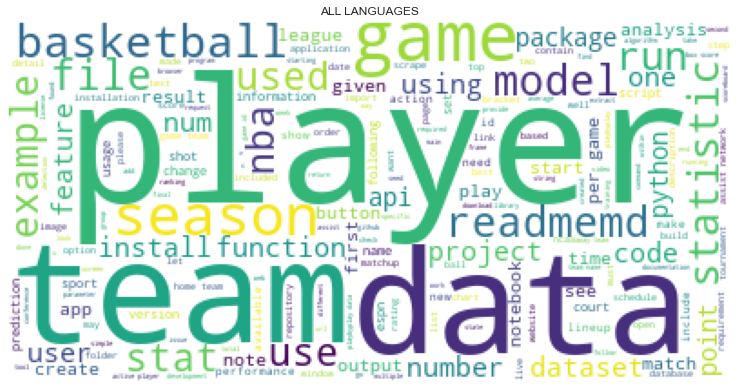

In [24]:
img = WordCloud(background_color='white')\
    .generate(all_ws)

plt.imshow(img)
plt.axis('off')
plt.title(all_.label.upper())
plt.show()

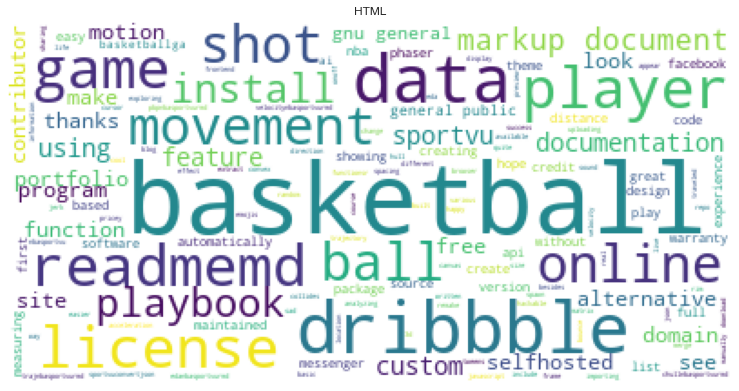

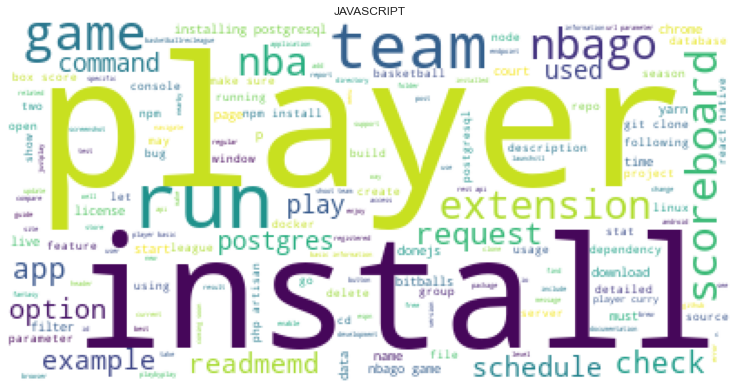

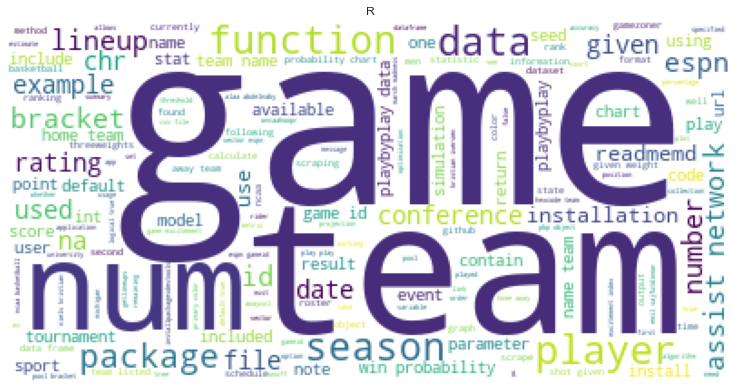

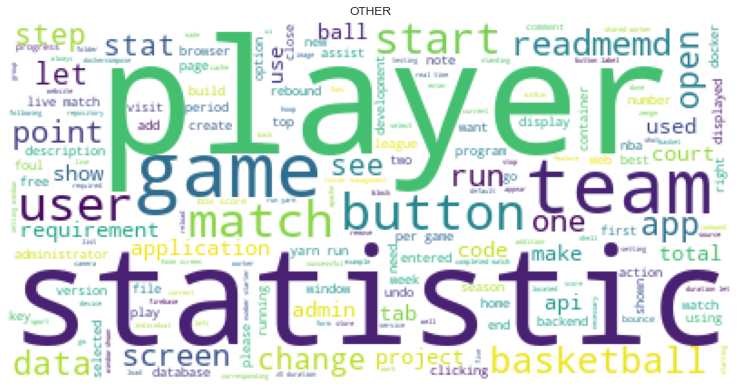

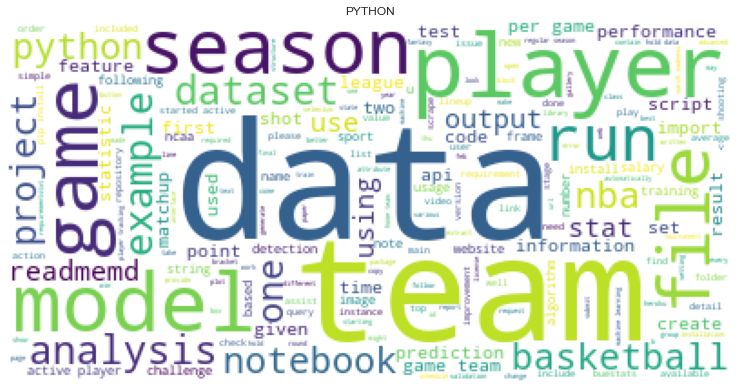

In [25]:
# iterates over the languages and creates a word cloud for each one 
for language in languages:
    
    #the words themselves can be accessed with dot notation on the object. same with the label
    img = WordCloud(background_color='white')\
        .generate(language.words)

    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label.upper())
    plt.show()
    
    



 Visualize them with a word cloud. How do they compare with the bigrams?


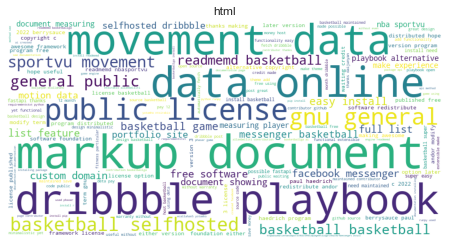

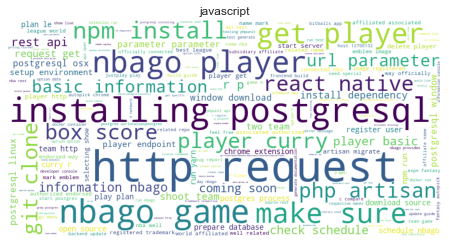

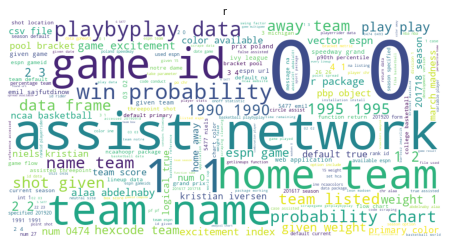

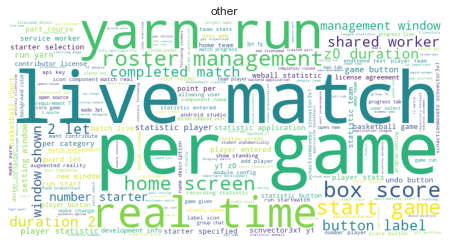

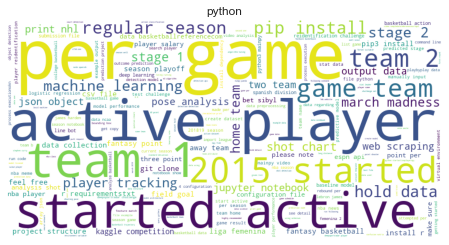

In [26]:
for language in languages:
    data = {' '.join(k): v for k, v in language.bigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

## Calculations for Slide Deck

In [28]:
html.word_counts()

basketball        20
dribbble           9
data               8
readmemd           6
license            6
                  ..
cool               1
course             1
hackable           1
live               1
basketballdemo     1
Length: 260, dtype: int64

In [29]:
html.whole_words().unique()

array(['readmemd', 'nbasportvu', 'code', 'exploring', 'nba', 'sportvu',
       'motion', 'data', 'information', 'blog', 'download', 'game',
       'repo', 'functionsr', 'various', 'function', 'written', 'include',
       'sportvuconvertjson', 'importing', 'json', 'frame', 'extract',
       'distance', 'player', 'traveled', 'create', 'matrix',
       'edanbasportvurmd', 'markup', 'document', 'showing', 'basic',
       'eda', 'movement', 'online', 'pbpnbasportvurmd', 'merge', 'play',
       'chullnbasportvurmd', 'measuring', 'spacing', 'using', 'convex',
       'hull', 'velocitynbasportvurmd', 'velocity', 'acceleration',
       'jerk', 'trajnbasportvurmd', 'sharing', 'different', 'way',
       'analyzing', 'ball', 'trajectory', 'basketball', 'feature',
       'remake', 'facebook', 'messenger', 'frontend', 'browser', 'built',
       'javascript', 'phaser', 'canvas', 'shot', 'direction', 'based',
       'cursor', 'change', 'size', 'make', 'experience', '3d', 'like',
       'sound', 'effect

In [30]:
len(df)

87

In [31]:
len(all_.whole_words())/len(df)

244.79310344827587

In [32]:
len(all_.whole_words())

21297

## Spotlight - Common Words 
* **Question:** What are the most common words in READMEs?
* **Answer:** (Word with # of appearances)
    - Team: 341
    - Game: 293
    - Player: 281 
    - Data: 263
    - Season: 144


In [156]:
# Isolate words by type/frequency
java_words = (' '.join(df.lemmatized[df.language == 'javascript'])).split()
python_words = (' '.join(df.lemmatized[df.language == 'python'])).split()
html_words = (' '.join(df.lemmatized[df.language == 'html'])).split()
other_words = (' '.join(df.lemmatized[df.language == 'other'])).split()
all_words = (' '.join(df.lemmatized)).split()

java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

# concatonate words for count
word_counts = (pd.concat([all_freq, java_freq, python_freq, html_freq, other_freq], axis=1, sort=True)
              .set_axis(['all','javascript', 'python', 'html','other'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [160]:
# Looking for top 5 words
all_freq.head()

team      341
game      293
player    281
data      263
season    144
dtype: int64

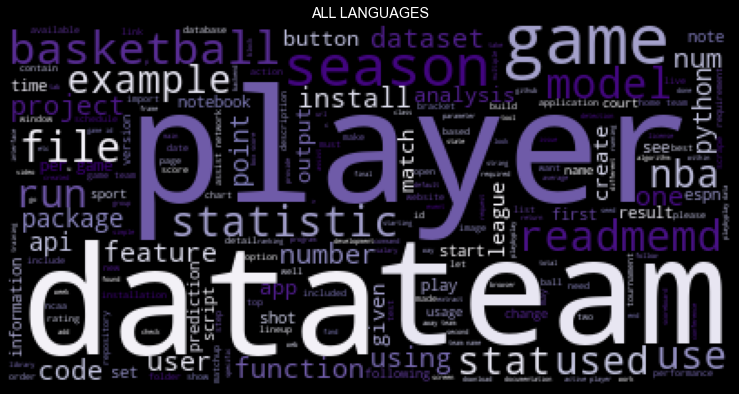

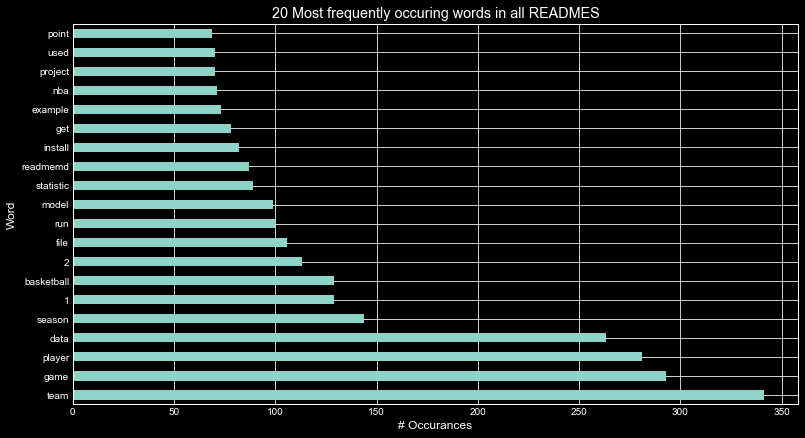

In [361]:
img = WordCloud(background_color='black',colormap='Purples').generate(' '.join(all_words))
plt.imshow(img)
plt.axis('off')
plt.title(all_.label.upper())
plt.show()
all_freq.head(20).plot.barh()
plt.title('20 Most frequently occuring words in all READMES')
plt.ylabel('Word')
plt.xlabel('# Occurances')
plt.show()

In [47]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'industry', 'Leisure and Hospitality with largest change')

## Spotlight - README Length
* **Question:** Does the length of the README vary by programming language?

* **Answer:** Yes, of the languages that were found, readme length tends to vary based on the language in the readme, with Java Script on average having the smallest README Lengths.

In [129]:
# Find the readme length by programming language
df.groupby('language').word_count.mean().sort_values(ascending=False)

language
r             384.142857
python        274.800000
other         183.636364
javascript    182.800000
html           72.166667
Name: word_count, dtype: float64

In [232]:
# Bar plot function for Vis
def bar_plot(df, target, readme_length):
    '''
    This function is to create a bar plot. Take in dataframe, a target and a feature
    '''
    df.groupby(target)[readme_length].mean().plot.bar()
    plt.title('Average Readme Lengths by Language')
    plt.ylabel('Readme Length')
    plt.show()

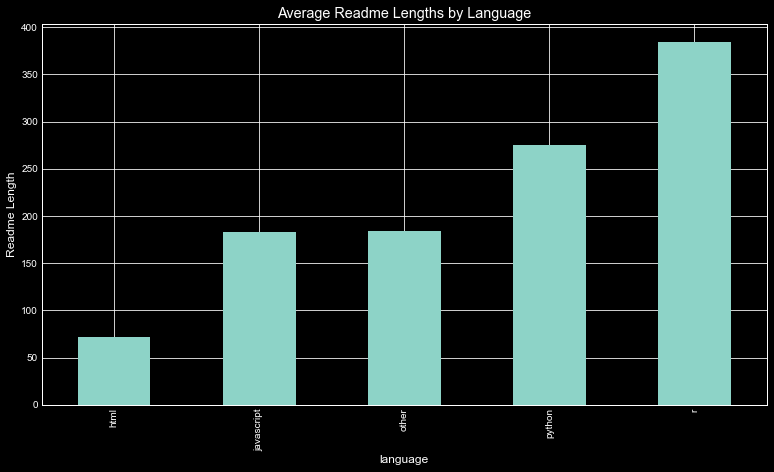

In [238]:
bar_plot(df, 'language', 'word_count')

In [307]:
def stat_test(train, readme_length):
    '''
    Perform 1 sample t-test comparing mean length of original
    README file per language to the overall average length (all languages)
    set the significance level to 0.05
    '''
    alpha = 0.05
    overall_mean_length_readme = df['word_count'].mean()
    for l in train.language.unique():
        sample = train[train.language == l]
        t,p = stats.ttest_1samp(sample[readme_length], overall_mean_length_readme)
        print(l, round(t,5), p<alpha)

In [308]:
# Perform 1 sample t-test comparing mean length of stemmed README file per language to the overall average length (all languages)
# Set significance level to 0.05
stat_test(df, 'word_count')

python 0.58739 False
html -5.97747 True
other -0.89041 False
javascript -1.69284 False
r 1.47501 False


In [50]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'race', 'White with largest change')

## Spotlight - Unique Words
* **Question:** Do different programming languages use a different number of unique words?
 
* **Answer:**  Yes, each programming language has a different number of Unique words. \
Python: 1733 \
JavaScript: 219 \
HTML: 83 \
Other: 607


In [309]:
def unique_counts(word_counts):
    '''
    This function takes our word_counts dataframe and finds the number of uniques to each language and returns them as their own dataframes. 
    '''
    # Adding a column for each language with 1 or 0 (str) to represent if it is unique to that language
    word_counts['python_unique'] = np.where(word_counts['all'] == word_counts['python'], '1', '0')
    word_counts['js_unique'] = np.where(word_counts['all'] == word_counts['javascript'], '1', '0')
    word_counts['html_unique'] = np.where(word_counts['all'] == word_counts['html'], '1', '0')
    word_counts['other_unique'] = np.where(word_counts['all'] == word_counts['other'], '1', '0')

    # Getting separate df's for these unique words
    python_unique = word_counts[['python']][word_counts.python_unique == '1']
    js_unique = word_counts[['javascript']][word_counts.js_unique == '1']
    html_unique = word_counts[['html']][word_counts.html_unique == '1']
    other_unique = word_counts[['other']][word_counts.other_unique == '1']

    # returning the three dataframes
    return python_unique, js_unique, html_unique, other_unique

In [310]:
python_unique, js_unique, html_unique, other_unique = unique_counts(word_counts)

In [138]:
# Concatenate readme content together for each language
python_ws = ' '.join(df[df.language == 'python'].lemmatized)
java_ws = ' '.join(df[df.language == 'javascript'].lemmatized)
html_ws = ' '.join(df[df.language == 'html'].lemmatized)
other_ws = ' '.join(df[df.language == 'other'].lemmatized)
r_ws = ' '.join(df[df.language == 'r'].lemmatized)
all_ws = ' '.join(df.lemmatized)

In [284]:
def most_common_word_plot():
    plt.subplot(221)
    plt.xlabel('Words', fontsize = 10)
    plt.ylabel('Frequency', fontsize = 10)
    plt.title(f"Top 20 Most Common Words for Python", fontsize = 20)
    sns.barplot(x=python_freq.head(20).index,y=python_freq.head(20).values, palette ='Purples_r')
    plt.xticks(rotation=45)
  
    plt.subplot(222)
    plt.xlabel('Words', fontsize = 10)
    plt.ylabel('Frequency', fontsize = 10)
    plt.title(f"Top 20 Most Common Words for Javascript", fontsize = 20)
    sns.barplot(x=java_freq.head(20).index,y=java_freq.head(20).values, palette ='Purples_r')
    plt.xticks(rotation=45)
  
    plt.subplot(223)
    plt.xlabel('Words', fontsize = 10)
    plt.ylabel('Frequency', fontsize = 10)
    plt.title(f"Top 20 Most Common Words for HTML", fontsize = 20)
    sns.barplot(x=html_freq.head(20).index,y=html_freq.head(20).values, palette ='Purples_r')
    plt.xticks(rotation=45)

    plt.subplot(224)
    plt.xlabel('Words', fontsize = 10)
    plt.ylabel('Frequency', fontsize = 10)
    plt.title(f"Top 20 Most Common Words for Other", fontsize = 20)
    sns.barplot(x=other_freq.head(20).index,y=other_freq.head(20).values, palette ='Purples_r')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return

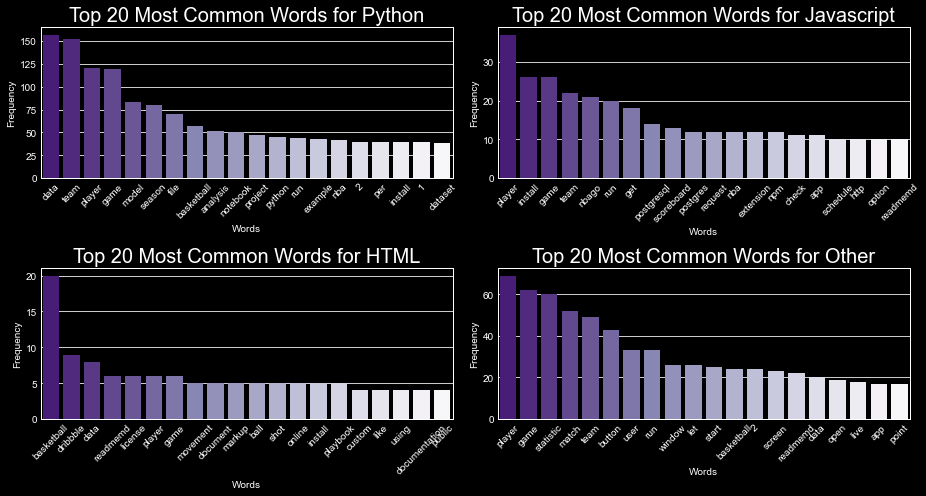

In [285]:
most_common_word_plot()

In [311]:
len(python_unique), len(js_unique), len(html_unique),len(other_unique)

(1733, 219, 83, 607)

In [52]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'professional_certification', 'Better to have certification')

## Spotlight - Language ID by Word
* **Question:** Are there any bigrams that uniquely identify a programming language?
 
* **Answer:** Yes, there are bigrams that uniquely identify a programming language.

In [53]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'professional_certification', 'Better to have certification')

In [140]:
python_bigrams = pd.Series(nltk.ngrams(python_ws.split(),2)).value_counts()
js_bigrams = pd.Series(nltk.ngrams(java_ws.split(),2)).value_counts()
html_bigrams = pd.Series(nltk.ngrams(html_ws.split(),2)).value_counts()
html_bigrams = pd.Series(nltk.ngrams(html_ws.split(),2)).value_counts()
other_bigrams = pd.Series(nltk.ngrams(other_ws.split(),2)).value_counts()
r_bigrams = pd.Series(nltk.ngrams(r_ws.split(), 2)).value_counts()

In [141]:
r_bigrams.sort_values(ascending=False)

(assist, network)        35
(win, probability)       29
(home, team)             27
(2017, 260)              26
(playbyplay, data)       25
                         ..
(mbb, game)               1
(updated, future)         1
(future, release)         1
(release, wpchartpbp)     1
(stepwise, search)        1
Length: 6526, dtype: int64

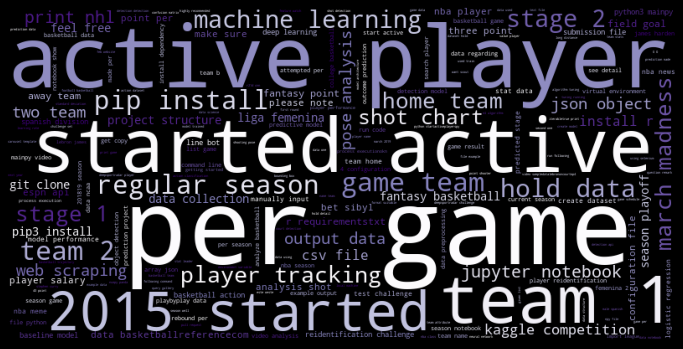

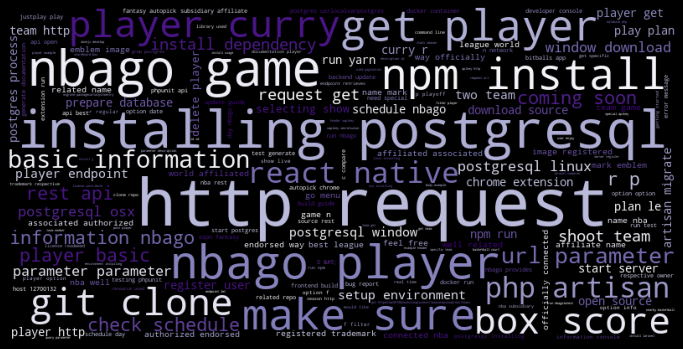

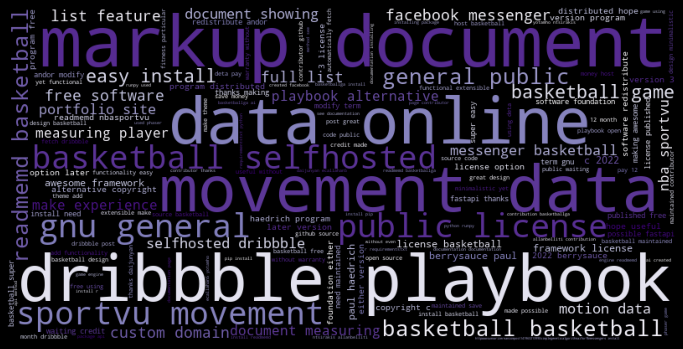

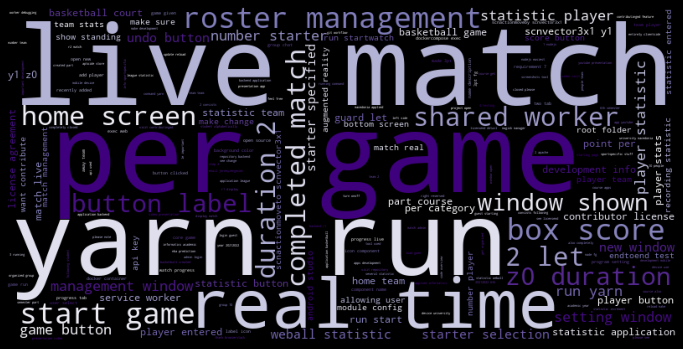

In [368]:
# iterates over the languages and creates a word cloud for each one 
bg_list = [python_bigrams, js_bigrams, html_bigrams, other_bigrams]
for bg in bg_list:
    data = {k[0] + ' ' + k[1]: v for k, v in bg.to_dict().items()}
    # Using wordcloud to visualize most common words
    img = WordCloud(background_color='black',colormap='Purples', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()